In [194]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import sklearn
import seaborn as sns
import sklearn.cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import linear_model

In [195]:
url = 'Non_Eruption_Analysis_Updated.csv'
non_erupting = pd.read_csv(url)
non_erupting = non_erupting.drop('Unnamed: 0', axis=1)
#non_erupting.replace('Na',np.nan, inplace=True)
non_erupting['Eruption'] = 0
non_erupting.head()
#non_erupting.keys()


,Track No.,avg_len,len_slope,len_stdev,len_skew,avg_area,area_slope,avg_chirality,area_stdev,area_skew,...,tilt_slope,tilt_stdev,tilt_skew,avg_xcen,avg_ycen,avg_L_to_W,L_to_W_slope,L_to_W_stdev,L_to_W_skew,Eruption
0,64,1.684990e+10,-34138.165974,5.904006e+09,-0.928417,4137.033154,-0.017818,-0.333333,2693.587062,-0.274744,...,-0.000149,46.496175,-1.771270,-393.722337,349.601664,0.576863,4.390244e-07,0.081144,0.650061,0
1,78,8.466804e+09,2144.843116,6.236700e+09,0.975963,1027.466580,-0.000113,0.250000,830.649261,0.816845,...,0.000007,6.119652,-0.277828,252.118356,610.773743,1.141795,3.176278e-07,0.117177,-0.578325,0
2,98,6.594708e+09,1851.432074,3.071358e+09,0.685979,1430.039796,0.000010,0.000000,978.095255,0.761166,...,-0.000023,32.689339,0.419343,-113.610078,752.170366,1.343330,9.991481e-07,0.434080,0.669225,0
3,106,1.046563e+10,7900.878619,4.507527e+09,0.589059,1707.308267,0.002999,-0.357143,1094.570333,0.545142,...,0.000021,36.431093,1.476287,-6.701898,401.333001,1.369825,1.159276e-06,0.515865,-0.417666,0
4,135,5.608656e+09,-4117.826868,3.004598e+09,0.637904,510.173797,0.000387,-0.166667,418.137901,0.947354,...,0.000070,35.771863,-0.626612,-174.864097,-272.210165,1.441349,1.871899e-06,0.702662,-0.643838,0


In [196]:
url = 'Eruption_Analysis_Updated.csv'

erupting = pd.read_csv(url)
erupting = erupting.drop('Unnamed: 0', axis=1)
#erupting.replace('Na',np.nan, inplace=True)
erupting = erupting.astype(float)
erupting['Eruption'] = 1
erupting = erupting.dropna()
erupting.head()

,Track No.,avg_len,len_slope,len_stdev,len_skew,avg_area,area_slope,avg_chirality,area_stdev,area_skew,...,tilt_slope,tilt_stdev,tilt_skew,avg_xcen,avg_ycen,avg_L_to_W,L_to_W_slope,L_to_W_stdev,L_to_W_skew,Eruption
0,2,9.235591e+09,-3318.847179,4.719764e+09,0.331922,1096.087085,-0.000501,-0.142857,649.915228,1.117098,...,0.000019,5.578701,-0.572575,185.844144,426.017713,2.528948,8.112376e-07,0.515202,-0.438115,1
1,21,4.233401e+09,-3301.151011,7.508346e+08,0.778914,406.428664,-0.000413,0.000000,117.529374,-0.055259,...,0.000327,58.593676,0.784443,-439.171745,329.000000,0.777862,-9.742141e-07,0.370526,0.505928,1
2,58,6.285527e+09,-14242.892568,3.976058e+09,0.532748,1372.983516,-0.003546,0.400000,1136.174186,0.730185,...,0.000109,14.510152,0.986719,-14.090422,680.316602,0.713528,1.894434e-06,0.258048,0.381963,1
3,93,9.655840e+09,-18001.523983,1.100131e+10,1.947158,3532.892874,-0.012692,-0.142857,6174.080589,2.020256,...,-0.000114,52.196091,0.383411,-172.326899,656.900129,1.219291,-1.265216e-06,0.455738,1.385877,1
4,94,2.051227e+10,-41452.149693,6.950779e+09,-0.305232,5151.553005,-0.009953,0.250000,2129.620185,0.535753,...,-0.000116,72.680738,-0.749395,80.834544,303.171875,0.524115,1.527499e-06,0.269581,2.036469,1


In [197]:
print len(erupting)
print len(non_erupting)

89
85


# Running various K-S tests to see which parameters may be good to test

In [264]:
p_values = []
items = []
for item in erupting.keys():
    eruption = erupting[item].tolist()
    neruption = non_erupting[item].tolist()
    ksscore = stats.ks_2samp(eruption, neruption)
    items.append(item)
    p_values.append(ksscore[1])
    print item
    #p_values.append(ksscore[1])
print p_values
test = pd.Series(p_values, index=items)
test.head

Track No.
avg_len
len_slope
len_stdev
len_skew
avg_area
area_slope
avg_chirality
area_stdev
area_skew
chirality_slope
avg_barbs
barb_slope
barb_stdev
barb_skew
avg_tilt
tilt_slope
tilt_stdev
tilt_skew
avg_xcen
avg_ycen
avg_L_to_W
L_to_W_slope
L_to_W_stdev
L_to_W_skew
Eruption
[0.95209459285123688, 0.77754903265023645, 0.11408582013950459, 0.29664984627742619, 0.095981719783312588, 0.65717162776033577, 0.11653493594737573, 0.19012836618940379, 0.25689210030607856, 0.34280029432781917, 0.0028622368369667032, 0.52003354995495199, 0.47538182332350826, 0.14000153591888387, 0.40588903818719363, 0.33055964954326517, 0.27577139897046066, 0.40588903818719407, 0.77754903265023645, 0.20833380168824586, 0.10745303117807332, 0.022819093755166674, 0.67965714369425656, 0.045256046152571311, 0.50027625698505895, 9.0266640260578603e-40]


<bound method Series.head of Track No.          9.520946e-01
avg_len            7.775490e-01
len_slope          1.140858e-01
len_stdev          2.966498e-01
len_skew           9.598172e-02
avg_area           6.571716e-01
area_slope         1.165349e-01
avg_chirality      1.901284e-01
area_stdev         2.568921e-01
area_skew          3.428003e-01
chirality_slope    2.862237e-03
avg_barbs          5.200335e-01
barb_slope         4.753818e-01
barb_stdev         1.400015e-01
barb_skew          4.058890e-01
avg_tilt           3.305596e-01
tilt_slope         2.757714e-01
tilt_stdev         4.058890e-01
tilt_skew          7.775490e-01
avg_xcen           2.083338e-01
avg_ycen           1.074530e-01
avg_L_to_W         2.281909e-02
L_to_W_slope       6.796571e-01
L_to_W_stdev       4.525605e-02
L_to_W_skew        5.002763e-01
Eruption           9.026664e-40
dtype: float64>

In [198]:
#KS test for filament length
erupt_len = erupting['avg_len'].tolist()
nerupt_len = non_erupting['avg_len'].tolist()
stats.ks_2samp(erupt_len, nerupt_len)

Ks_2sampResult(statistic=0.097951090548578978, pvalue=0.77754903265023645)

In [199]:
#KS test for change in length (slope)
erupt_slen = erupting['len_slope'].tolist()
nerupt_slen = non_erupting['len_slope'].tolist()
stats.ks_2samp(erupt_slen, nerupt_slen)

Ks_2sampResult(statistic=0.17779246530072701, pvalue=0.11408582013950459)

In [200]:
erupt_area = erupting['avg_area'].tolist()
nerupt_area = non_erupting['avg_area'].tolist()
stats.ks_2samp(erupt_area, nerupt_area)

Ks_2sampResult(statistic=0.10879048248512879, pvalue=0.65717162776033577)

In [201]:
#KS test for change in area (slope)
erupt_sarea = erupting['area_slope'].astype(float).tolist()
nerupt_sarea = non_erupting['area_slope'].astype(float).tolist()
stats.ks_2samp(erupt_sarea, nerupt_sarea)

Ks_2sampResult(statistic=0.17713152676801058, pvalue=0.11653493594737573)

In [202]:
erupt_chiral = erupting['avg_chirality'].tolist()
nerupt_chiral = non_erupting['avg_chirality'].tolist()
stats.ks_2samp(erupt_chiral, nerupt_chiral)

Ks_2sampResult(statistic=0.16113681427627233, pvalue=0.19012836618940379)

In [203]:
erupt_schiral = erupting['chirality_slope'].astype(float).tolist()
nerupt_schiral = non_erupting['chirality_slope'].astype(float).tolist()
stats.ks_2samp(erupt_schiral, nerupt_schiral)

Ks_2sampResult(statistic=0.26886979510905484, pvalue=0.0028622368369667032)

In [204]:
erupt_tilt = erupting['avg_tilt'].tolist()
nerupt_tilt = non_erupting['avg_tilt'].tolist()
stats.ks_2samp(erupt_tilt, nerupt_tilt)

Ks_2sampResult(statistic=0.14077990746860544, pvalue=0.33055964954326517)

In [205]:
erupt_stilt = erupting['tilt_slope'].dropna().astype(float).tolist()
nerupt_stilt = non_erupting['tilt_slope'].dropna().astype(float).tolist()
stats.ks_2samp(erupt_stilt, nerupt_stilt)

Ks_2sampResult(statistic=0.14778585591539983, pvalue=0.27577139897046066)

# Preparing for random forest classifier by putting erupting/nonerupting data together

In [206]:
##Now lets see if we can predict whether a filament will erupt or not. 
#erupting = erupting.astype(float)
all_eruptions=erupting.append(non_erupting)#,ignore_index = True)   #adding everything together
#all_eruptions = all_eruptions.dropna() #for now, dropping everything with NaN
all_eruptions.head()

,Track No.,avg_len,len_slope,len_stdev,len_skew,avg_area,area_slope,avg_chirality,area_stdev,area_skew,...,tilt_slope,tilt_stdev,tilt_skew,avg_xcen,avg_ycen,avg_L_to_W,L_to_W_slope,L_to_W_stdev,L_to_W_skew,Eruption
0,2,9.235591e+09,-3318.847179,4.719764e+09,0.331922,1096.087085,-0.000501,-0.142857,649.915228,1.117098,...,0.000019,5.578701,-0.572575,185.844144,426.017713,2.528948,8.112376e-07,0.515202,-0.438115,1
1,21,4.233401e+09,-3301.151011,7.508346e+08,0.778914,406.428664,-0.000413,0.000000,117.529374,-0.055259,...,0.000327,58.593676,0.784443,-439.171745,329.000000,0.777862,-9.742141e-07,0.370526,0.505928,1
2,58,6.285527e+09,-14242.892568,3.976058e+09,0.532748,1372.983516,-0.003546,0.400000,1136.174186,0.730185,...,0.000109,14.510152,0.986719,-14.090422,680.316602,0.713528,1.894434e-06,0.258048,0.381963,1
3,93,9.655840e+09,-18001.523983,1.100131e+10,1.947158,3532.892874,-0.012692,-0.142857,6174.080589,2.020256,...,-0.000114,52.196091,0.383411,-172.326899,656.900129,1.219291,-1.265216e-06,0.455738,1.385877,1
4,94,2.051227e+10,-41452.149693,6.950779e+09,-0.305232,5151.553005,-0.009953,0.250000,2129.620185,0.535753,...,-0.000116,72.680738,-0.749395,80.834544,303.171875,0.524115,1.527499e-06,0.269581,2.036469,1


In [207]:
all_eruptions['L_to_W_stdev'].describe()

count    174.000000
mean       0.376009
std        0.226999
min        0.037495
25%        0.215479
50%        0.324009
75%        0.484825
max        1.196795
Name: L_to_W_stdev, dtype: float64

In [208]:
#The random forest does a better job with values near 0 in general
#So here I am going to scale all of the values so they get closer to 0
all_eruptions['avg_len'] = all_eruptions['avg_len']/1e9
all_eruptions['len_slope'] = all_eruptions['len_slope']/1e3
all_eruptions['len_stdev'] = all_eruptions['len_stdev']/1e8
all_eruptions['avg_area'] = all_eruptions['avg_area']/100
all_eruptions['area_slope'] = all_eruptions['area_slope']*100
all_eruptions['area_stdev'] = all_eruptions['area_stdev']/100
all_eruptions['avg_chirality'] = all_eruptions['avg_chirality']*10
all_eruptions['chirality_slope'] = all_eruptions['chirality_slope']*1e6
all_eruptions['barb_slope'] = all_eruptions['barb_slope']*1e6
all_eruptions['tilt_slope'] = all_eruptions['tilt_slope']*1e4
all_eruptions['L_to_W_slope'] = all_eruptions['L_to_W_slope']*1e6
all_eruptions.head()

,Track No.,avg_len,len_slope,len_stdev,len_skew,avg_area,area_slope,avg_chirality,area_stdev,area_skew,...,tilt_slope,tilt_stdev,tilt_skew,avg_xcen,avg_ycen,avg_L_to_W,L_to_W_slope,L_to_W_stdev,L_to_W_skew,Eruption
0,2,9.235591,-3.318847,47.197644,0.331922,10.960871,-0.050083,-1.428571,6.499152,1.117098,...,0.188188,5.578701,-0.572575,185.844144,426.017713,2.528948,0.811238,0.515202,-0.438115,1
1,21,4.233401,-3.301151,7.508346,0.778914,4.064287,-0.041343,0.000000,1.175294,-0.055259,...,3.266641,58.593676,0.784443,-439.171745,329.000000,0.777862,-0.974214,0.370526,0.505928,1
2,58,6.285527,-14.242893,39.760582,0.532748,13.729835,-0.354642,4.000000,11.361742,0.730185,...,1.088524,14.510152,0.986719,-14.090422,680.316602,0.713528,1.894434,0.258048,0.381963,1
3,93,9.655840,-18.001524,110.013136,1.947158,35.328929,-1.269208,-1.428571,61.740806,2.020256,...,-1.144360,52.196091,0.383411,-172.326899,656.900129,1.219291,-1.265216,0.455738,1.385877,1
4,94,20.512269,-41.452150,69.507794,-0.305232,51.515530,-0.995295,2.500000,21.296202,0.535753,...,-1.156885,72.680738,-0.749395,80.834544,303.171875,0.524115,1.527499,0.269581,2.036469,1


In [209]:
#Pull out the feature we want to predict (1 for eruption, 0 for no eruption)
Y = np.array(all_eruptions['Eruption'])  #getting the eruption status (variable that is trying to be predicted)

In [210]:
all_eruptions.to_csv('All_Eruption_Analysis_Updated.csv', columns = ('Track No.', 'avg_len', 'len_slope', 'avg_area', 'area_slope', 'avg_chirality', 'chirality_slope', 'avg_barbs', 'barb_slope','avg_tilt', 'tilt_slope','avg_xcen','avg_ycen','avg_L_to_W','L_to_W_slope'))

In [211]:
#Now we need to remove that from our dataset. 
all_eruptions = all_eruptions.drop('Eruption',1)  #now dropping the eruption column! 

In [212]:
#Now we need to save all of the features as a matrix for the calucations later
X = all_eruptions.as_matrix()
print X

[[  2.00000000e+00   9.23559087e+00  -3.31884718e+00 ...,   8.11237628e-01
    5.15202369e-01  -4.38115396e-01]
 [  2.10000000e+01   4.23340084e+00  -3.30115101e+00 ...,  -9.74214111e-01
    3.70525916e-01   5.05927719e-01]
 [  5.80000000e+01   6.28552740e+00  -1.42428926e+01 ...,   1.89443366e+00
    2.58047689e-01   3.81962761e-01]
 ..., 
 [  2.81300000e+03   1.01816893e+01  -8.44726188e+00 ...,   4.91516565e-01
    6.86767636e-01   2.00810241e-01]
 [  2.89400000e+03   4.31539991e+00   3.95702745e+00 ...,  -5.11645659e-01
    1.87616691e-01  -4.68776227e-02]
 [  2.94600000e+03   6.06822115e+00   7.31843541e+00 ...,  -3.38142475e-01
    1.44236955e-01  -5.96146370e-01]]


Our goal is to be able to predict the outcome (Y) by using the features (X)
Since we have a binary outcome, we want to use a classification scheme
Because of this, I am going to try to use a random forest classifier (I can send you details on what this is)
This is a good method when there is only a small sample (200 events is very small in data science)



In [213]:
## your code here
non_erupt = 0.
for eruption in Y:
    if eruption == 0:
        non_erupt = non_erupt+1.
avg = non_erupt/len(Y)
print avg
print '%d percent of filaments do NOT erupt. Our sample is not quite balanced, but pretty close' % (avg*100)

0.488505747126
48 percent of filaments do NOT erupt. Our sample is not quite balanced, but pretty close


In [214]:
#Let's start by making 40 different 'forests' (based on decision trees)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
n_trees = range(1,41)
scores_range = []
#This will make 40 forests, and each forest will be made up of 1-40 trees successively
#This way, we can see how much of an effect adding more trees has on the predictions.
for i in n_trees:
    forest = sklearn.ensemble.RandomForestClassifier(n_estimators = i)
    #val_score = cross_val_score(forest, X=X, y=Y, cv=10)
    val_score = cross_val_score(forest, X, Y, cv=StratifiedKFold(Y,10, shuffle=True)) #Try out a new type of scoring
    scores_range.append(val_score) 

0.584465890523


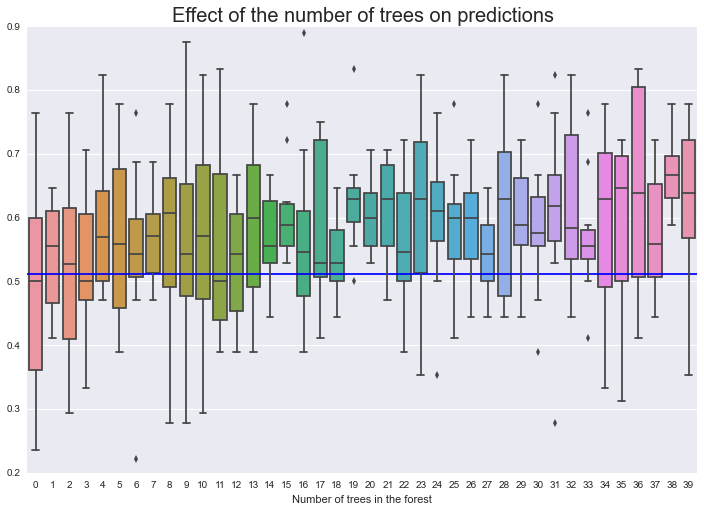

In [215]:
#How good at prediction is my tree? (I ran 40 different tests, so each bar is one test).
print np.mean(scores)
from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plt.title('Effect of the number of trees on predictions', fontsize=20)
plt.xlabel('Number of trees in the forest')
plt.axhline(y=1-avg)
sns.boxplot(data=scores_range)
plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/forests_with_1_to_40_trees.png')
#sns.boxplot(scores) #NOTE: Use this line if you have the older version of seaborn!!
#plt.savefig("/home/nschanch/Downloads/test_img.png")
#Note: This is before correcting for the unbalanced sample size. 

In [242]:

#Let's start by making 40 different 'trees' (based on decisions)
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

#Unlike above, now we want to make 40 different forests, each conaining the same number of trees (25)
n_trees = [25]*40
scores = []
#This will make 40 forests, and each forest will be made up of 1-40 trees successively
#This way, we can see how much of an effect adding more trees has on the predictions.
for i in n_trees:
    forest = sklearn.ensemble.RandomForestClassifier(n_estimators = i)
    val_score = cross_val_score(forest, X, Y, cv=StratifiedKFold(Y,10, shuffle=True))
    #val_score = cross_val_score(forest, X=X, y=Y, cv=10)
    scores.append(val_score) 

0.598878676471


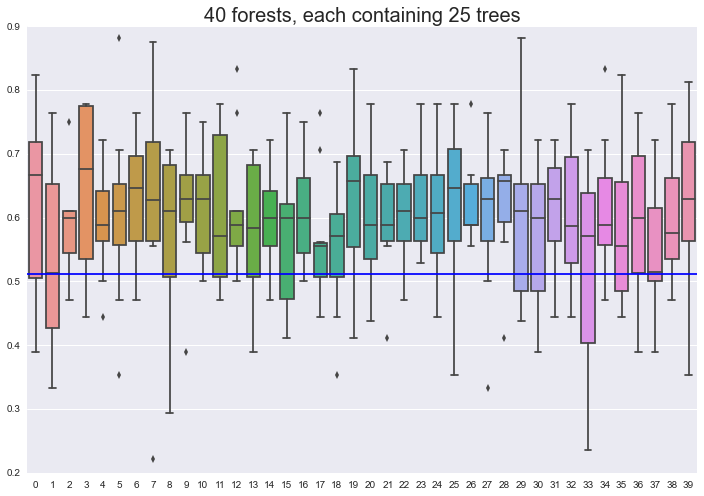

In [243]:
#How good at prediction is my tree? (I ran 40 different test, so each bar is one test).
print np.mean(scores)
from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plt.title('40 forests, each containing 25 trees', fontsize=20)
sns.boxplot(data=scores)
plt.axhline(y=1-avg)
plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/forests_with_25_trees.png')
#sns.boxplot(scores)
#Note: This is before correcting for the unbalanced sample size. 

In [218]:
#print np.mean(scores)
#plt.figure(figsize=(12,8))
#plt.axhline(y=1-avg)
#plt.title('Effect of the number of trees on predictions compared to guessing the eruption class', fontsize=15)
#plt.xlabel('Number of Trees', fontsize=15)
#plt.ylabel('Prediction Accuracy', fontsize=15)
#sns.boxplot(data=scores)
#sns.boxplot(scores)
#plt.savefig('/home/nschanch/Desktop/random_forest_20_trees.png')

In [244]:
scores_2 = []
n_trees = [25]*40
for i in n_trees:
    forest_2 = sklearn.ensemble.RandomForestClassifier(n_estimators = i)
    #Same thing, but using a different type of scoring (f1)
    #The F1 score is defined as the harmonic mean of recall and precision
    #So this tries to balance how well it does at picking out all of the erupting filaments and how many erupting filaments it is correct about
    val_score_2 = cross_val_score(forest_2, X=X, y=Y, cv=StratifiedKFold(Y,10, shuffle=True), scoring='f1')
    scores_2.append(val_score_2) 

0.6063162921


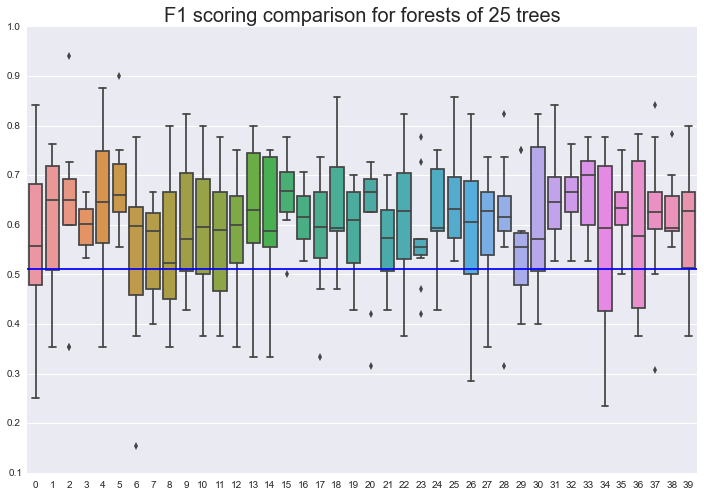

In [245]:
print np.mean(scores_2)
plt.figure(figsize=(12,8))
plt.title('F1 scoring comparison for forests of 25 trees',fontsize=20)
sns.boxplot(data=scores_2)
#sns.boxplot(scores_2)
plt.axhline(y=1-avg)
plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/f1_scoring_25_trees.png')

I don't really see a big difference between the two types of scoring...

In [221]:
#make the forest classifier and do that fit. Then find the probabilities
forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 25)
fitted_forest = forest.fit(X, Y)
proba = fitted_forest.predict_proba(X)

#Make a prediction based on probabilities
class_predict = fitted_forest.predict(X)
print class_predict[:10]


#Now just make a prediction based on raw values of the probabilities
erupt_good = proba[:, 1]
sanity_predict = [0]*len(erupt_good)
print erupt_good[:10]
for i in range(len(sanity_predict)):
    if erupt_good[i] > 0.5:
        sanity_predict[i] = 1
    else:
        sanity_predict[i] = 0
        
        
print sanity_predict[:10]
#val_score = cross_val_score(forest, X=X, y=Y, cv=10)
#scores.append(val_score) 

(class_predict == sanity_predict).all()

[1 1 1 1 1 1 1 1 1 1]
[ 0.84  0.92  0.88  0.92  0.84  0.8   0.8   0.72  0.8   0.84]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


True

In [222]:
from sklearn.cross_validation import StratifiedKFold, KFold
#Which features are leading to the good predictions?
feature_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
#by_feature = feature_forest.feature_importances_
fitted_forest4a = feature_forest.fit(X, Y)
val_score_ = cross_val_score(fitted_forest4a, X=X, y=Y, cv=10)

val_score2_ = cross_val_score(fitted_forest4a, X=X,y=Y, cv=StratifiedKFold(Y,10))
imp_features = fitted_forest4a.feature_importances_
print val_score_
print val_score2_
print all_eruptions.keys()
print imp_features

[ 0.61111111  0.61111111  0.61111111  0.55555556  0.5         0.58823529
  0.52941176  0.47058824  0.64705882  0.75      ]
[ 0.5         0.5         0.61111111  0.61111111  0.38888889  0.41176471
  0.52941176  0.64705882  0.52941176  0.625     ]
Index([u'Track No.', u'avg_len', u'len_slope', u'len_stdev', u'len_skew',
       u'avg_area', u'area_slope', u'avg_chirality', u'area_stdev',
       u'area_skew', u'chirality_slope', u'avg_barbs', u'barb_slope',
       u'barb_stdev', u'barb_skew', u'avg_tilt', u'tilt_slope', u'tilt_stdev',
       u'tilt_skew', u'avg_xcen', u'avg_ycen', u'avg_L_to_W', u'L_to_W_slope',
       u'L_to_W_stdev', u'L_to_W_skew'],
      dtype='object')
[ 0.03130545  0.02599308  0.06208518  0.03877762  0.03875778  0.03720424
  0.02630154  0.04490794  0.0375003   0.02190042  0.05632862  0.02899119
  0.05293874  0.05174316  0.03547853  0.03515556  0.02560038  0.04463839
  0.03084021  0.03135621  0.04769459  0.06070439  0.04596996  0.04926792
  0.03855858]


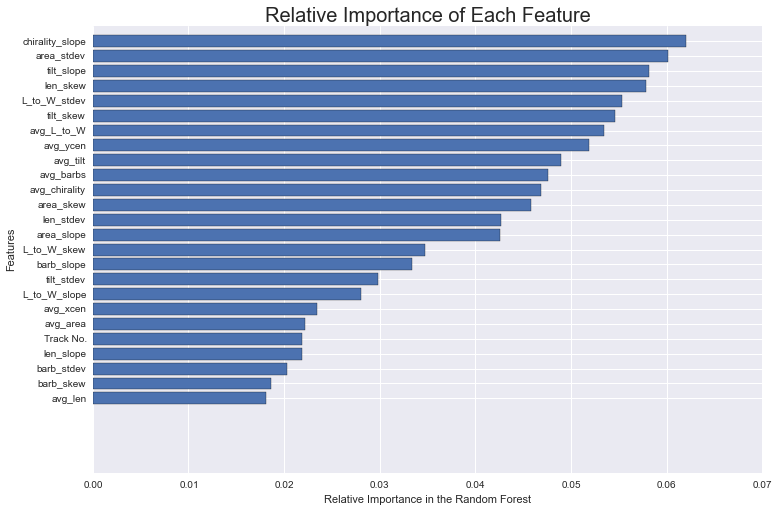

In [223]:
#Whitch features are most useful for prediction?
plt.figure(figsize=(12,8))
clf = RandomForestClassifier(n_estimators=15)

clf.fit(X,Y)
importance_list = clf.feature_importances_
name_list = all_eruptions.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative Importance of Each Feature',fontsize=20)
plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/feature_importance.png')
plt.show()
#plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/feature_importance.png')

In [224]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y,cmap=plt.cm.Paired)
    plt.show()

In [225]:
#Look at the predictions.
#eruptions_subset = all_eruptions[['tilt_slp','area_slp']].as_matrix()


#subset_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
#fitted_subset = subset_forest.fit(eruptions_subset, Y)
#subset_val_score = cross_val_score(subset_forest, X=wine_subset, y=Y, cv=10)
#plt.title('Random Forest Decision Tree Surface')
#plot_decision_surface(fitted_subset, eruptions_subset, Y)

In [226]:
#eruptions_subset = all_eruptions[['fi_tilt_avg','fi_area_avg']].as_matrix()


#subset_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
#fitted_subset = subset_forest.fit(eruptions_subset, Y)
#subset_val_score = cross_val_score(subset_forest, X=wine_subset, y=Y, cv=10)
#plt.title('Random Forest Decision Tree Surface')
#plot_decision_surface(fitted_subset, eruptions_subset, Y)

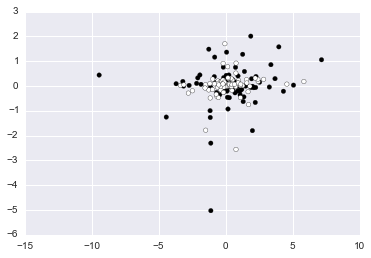

In [227]:
colors = Y
plt.scatter(all_eruptions['tilt_slope'],all_eruptions['area_slope'], c=colors)

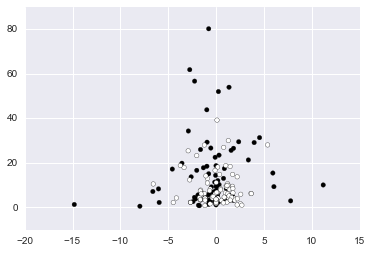

In [251]:
plt.scatter(all_eruptions['chirality_slope'],all_eruptions['area_stdev'], c=colors)

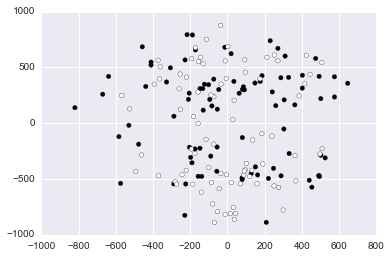

In [228]:
colors = Y
plt.scatter(all_eruptions['avg_xcen'],all_eruptions['avg_ycen'], c=colors)

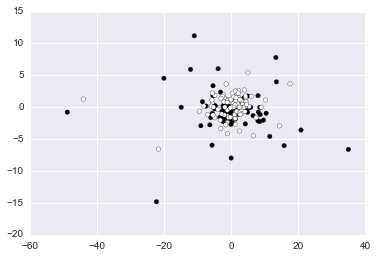

In [229]:
colors = Y
plt.scatter(all_eruptions['barb_slope'],all_eruptions['chirality_slope'], c=colors)

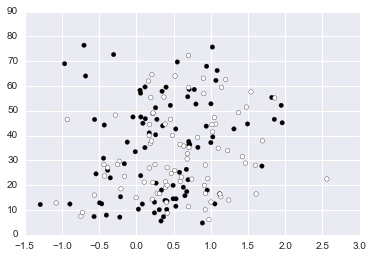

In [230]:
colors = Y
plt.scatter(all_eruptions['len_skew'],all_eruptions['tilt_stdev'], c=colors)

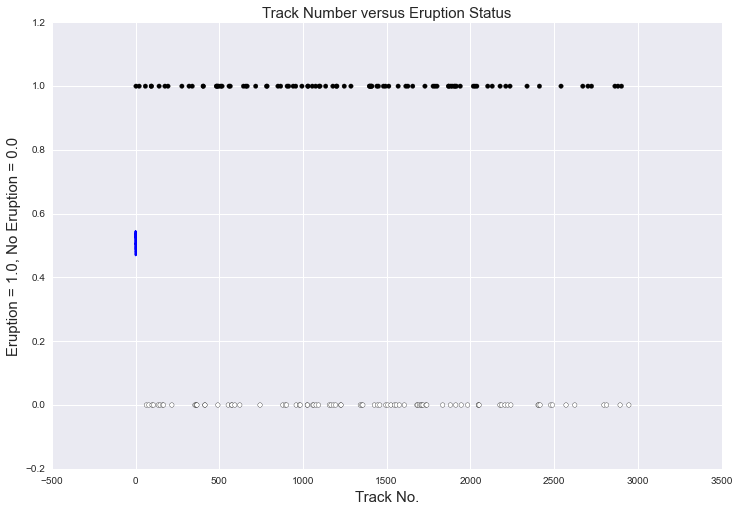

In [231]:
area_slp_X=all_eruptions['area_slope']
clf = linear_model.LinearRegression()
plt.figure(figsize=(12,8))
colors = Y
plt.scatter(all_eruptions['Track No.'], Y, c=colors)
plt.title('Track Number versus Eruption Status', fontsize = 15)
plt.ylabel('Eruption = 1.0, No Eruption = 0.0', fontsize = 15)
plt.xlabel('Track No.', fontsize = 15)
clf.fit(all_eruptions['Track No.'][:,np.newaxis],Y)
plt.plot(area_slp_X, clf.predict(all_eruptions['Track No.'][:,np.newaxis]), color='blue')

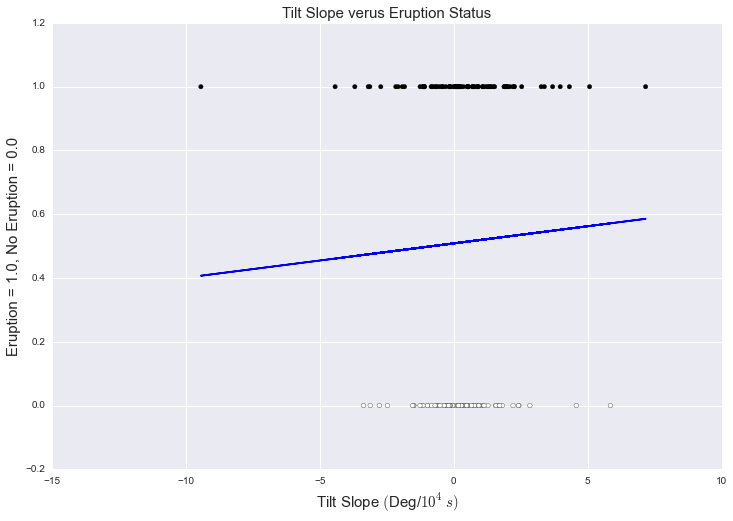

In [232]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
clf = linear_model.LinearRegression()
tilt_slp_X = np.array(all_eruptions['tilt_slope'])
plt.figure(figsize=(12,8))
colors = Y
plt.scatter(tilt_slp_X, Y, c=colors)
#clf = Ridge(alpha=1.0)
#clf = linear_model.LogisticRegression(C=1e3)
clf = linear_model.LinearRegression()
clf.fit(tilt_slp_X[:,np.newaxis],Y)
plt.clf()
plt.scatter(tilt_slp_X, Y, c=colors)
plt.plot(tilt_slp_X, clf.predict(tilt_slp_X[:,np.newaxis]), color='blue')
#plt.xlim(0,.05)
#print Y
#print all_eruptions['area_slp']
plt.title('Tilt Slope verus Eruption Status', fontsize = 15)
plt.xlabel(r'Tilt Slope $($Deg/$10^4s)$', fontsize = 15)
plt.ylabel('Eruption = 1.0, No Eruption = 0.0', fontsize = 15)
plt.figure(figsize=(12,8))
Y_predict = clf.predict(tilt_slp_X[:,np.newaxis])
#fig.gca().set_xlabel(r'wavelength $5000 \AA$')

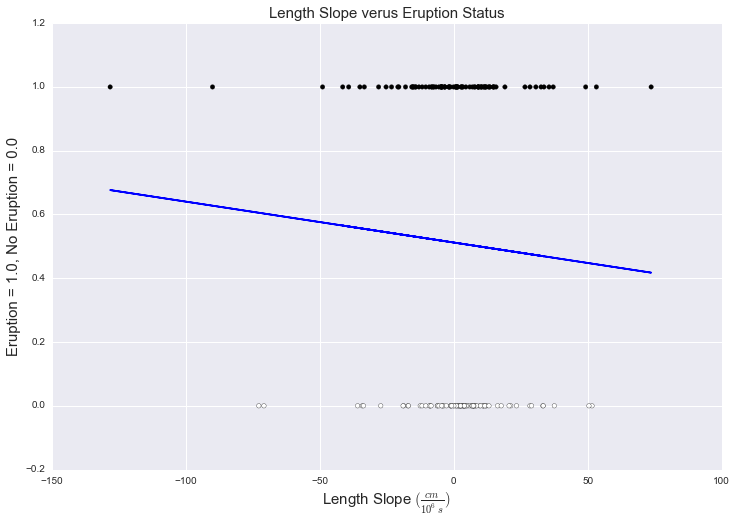

In [233]:
clf = linear_model.LinearRegression()
length_slp_X = np.array(all_eruptions['len_slope'])
plt.figure(figsize=(12,8))
colors = Y
plt.scatter(length_slp_X, Y, c=Y)
clf.fit(length_slp_X[:,np.newaxis],Y)
plt.plot(length_slp_X, clf.predict(length_slp_X[:,np.newaxis]), color='blue')
#plt.xlim(0,.05)
#print Y
#print all_eruptions['area_slp']
plt.title('Length Slope verus Eruption Status', fontsize = 15)
plt.xlabel(r'Length Slope $(\frac{cm}{10^6s})$', fontsize = 15)
plt.ylabel('Eruption = 1.0, No Eruption = 0.0', fontsize = 15)
plt.grid(True)
plt.show()

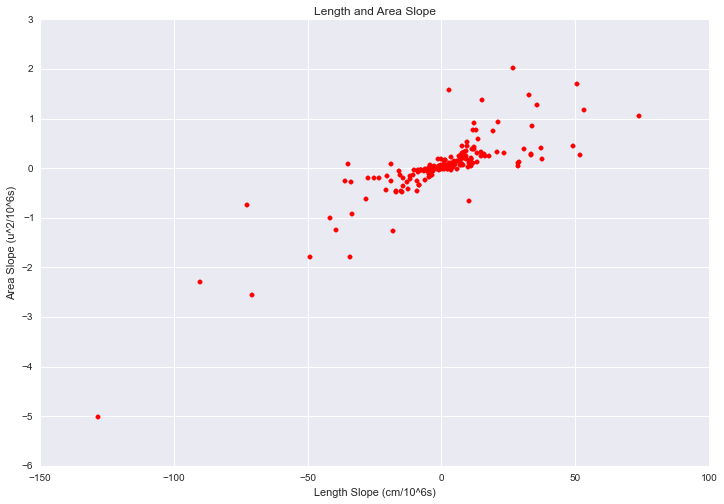

In [234]:
#clf = linear_model.LinearRegression()
length_slp_X = np.array(all_eruptions['len_slope'])
area_slp_X = np.array(all_eruptions['area_slope'])
plt.figure(figsize=(12,8))
plt.scatter(length_slp_X, area_slp_X, color='red')
#clf.fit(length_slp_X[:,np.newaxis],Y)
#plt.plot(length_slp_X, clf.predict(length_slp_X[:,np.newaxis]), color='blue')
#plt.xlim(0,.05)
#print Y
#print all_eruptions['area_slp']
plt.title('Length and Area Slope')
plt.xlabel('Length Slope (cm/10^6s)')
plt.ylabel('Area Slope (u^2/10^6s)')
plt.grid(True)
plt.show()

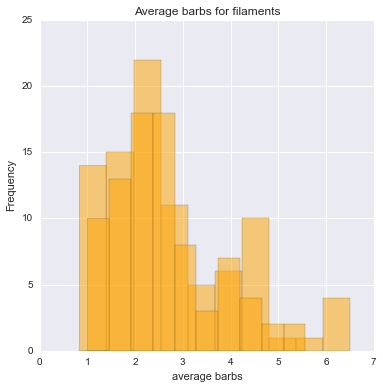

In [235]:
colors=Y
plt.xlabel('average barbs')
plt.ylabel('Number of Instances')
#plt.xlim([-3,3])
plt.title('Average barbs for filaments')
fig1 = plt.gcf()
fig1.set_size_inches(5.5,5.5)
plt.tight_layout()
erupting['avg_barbs'].plot(kind='hist',rwidth=1.5,  alpha=0.5,color='orange')
non_erupting['avg_barbs'].plot(kind='hist',rwidth=1.5, alpha=0.5, color='orange')
plt.show()
#all_eruptions['avg_barbs'].plot(kind=hist, c=colors)

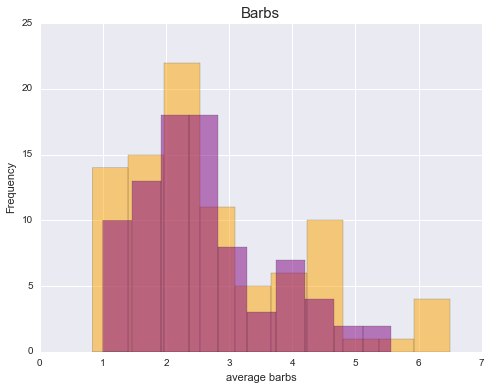

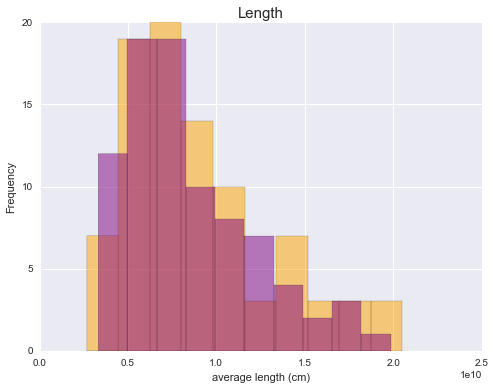

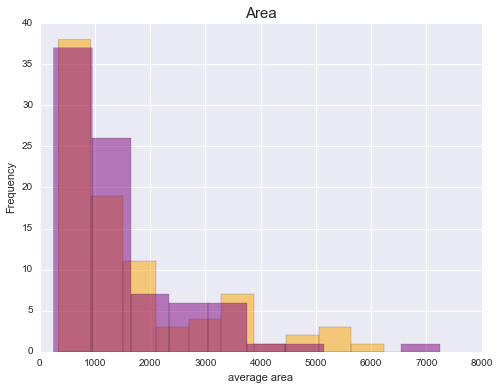

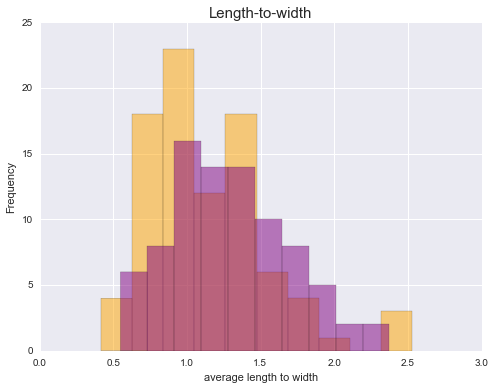

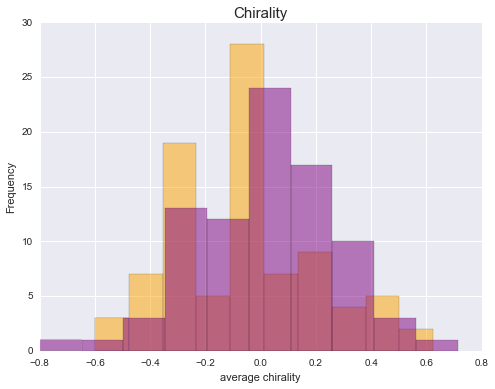

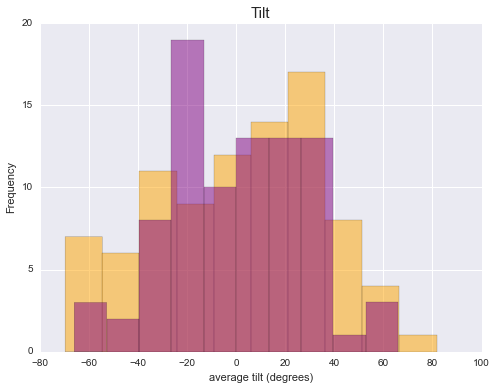

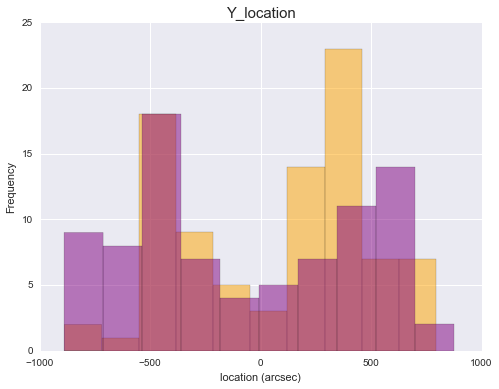

In [250]:
def comparison_plots(parameter, title, xlabel):
    colors=Y
    plt.xlabel(xlabel)
    plt.ylabel('Number of Instances')
    #plt.xlim([-3,3])
    plt.title(title, fontsize=15)
    fig1 = plt.gcf()
    fig1.set_size_inches(7,5.5)
    plt.tight_layout()
    erupting[parameter].plot(kind='hist',rwidth=1.5,  alpha=0.5,color='orange')
    non_erupting[parameter].plot(kind='hist',rwidth=1.5, alpha=0.5, color='purple')
    plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/%s_hisogram.png'%title)
    plt.show()
    #all_eruptions['avg_barbs'].plot(kind=hist, c=colors)
comparison_plots('avg_barbs','Barbs','average barbs')
comparison_plots('avg_len','Length','average length (cm)')
comparison_plots('avg_area','Area','average area')
comparison_plots('avg_L_to_W','Length-to-width','average length to width')
comparison_plots('avg_chirality','Chirality','average chirality')
comparison_plots('avg_tilt','Tilt','average tilt (degrees)')
comparison_plots('avg_ycen','Y_location','location (arcsec)')

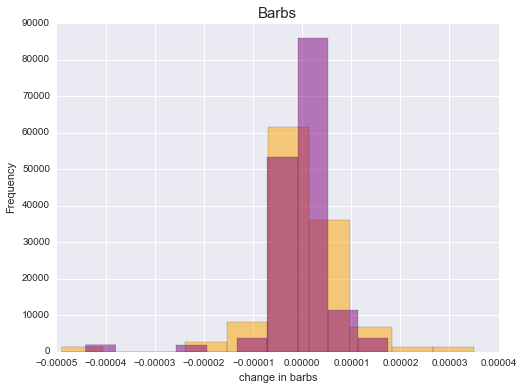

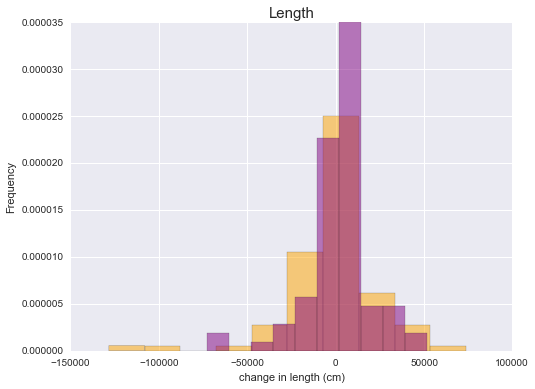

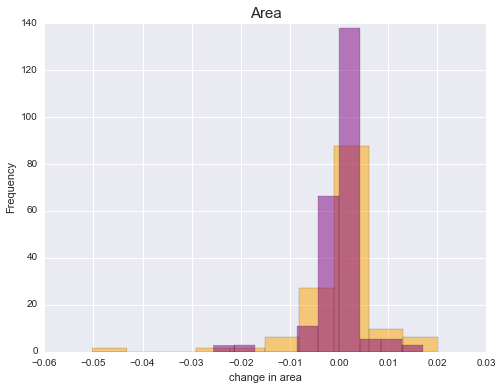

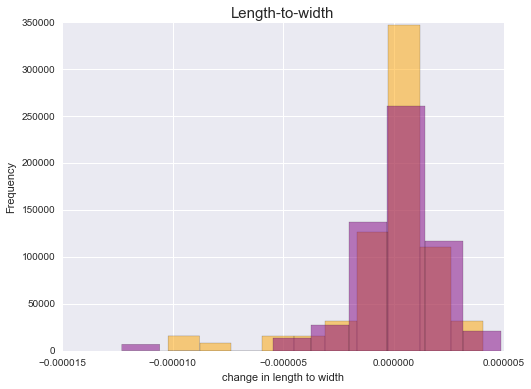

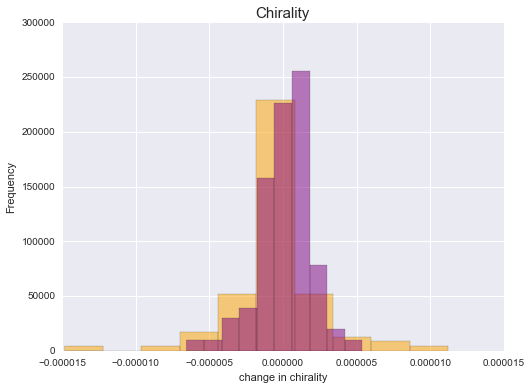

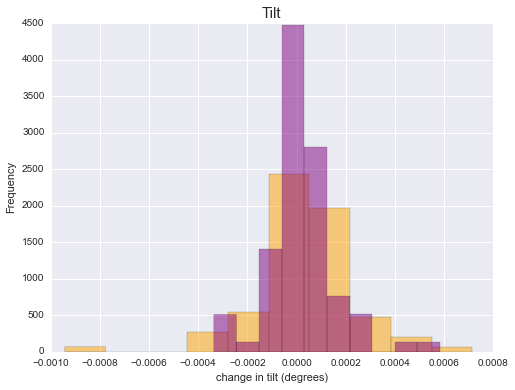

In [252]:
def comparison_plots_slope(parameter, title, xlabel):
    colors=Y
    plt.xlabel(xlabel)
    plt.ylabel('Number of Instances')
    #plt.xlim([-3,3])
    plt.title(title, fontsize=15)
    fig1 = plt.gcf()
    fig1.set_size_inches(7,5.5)
    plt.tight_layout()
    erupting[parameter].plot(kind='hist',rwidth=1.5,  alpha=0.5,color='orange',stacked=True, normed=True)
    non_erupting[parameter].plot(kind='hist',rwidth=1.5, alpha=0.5, color='purple',stacked=True, normed=True)
    plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/%s_change_hisogram.png'%title)
    plt.show()
    #all_eruptions['avg_barbs'].plot(kind=hist, c=colors)
comparison_plots_slope('barb_slope','Barbs','change in barbs')
comparison_plots_slope('len_slope','Length','change in length (cm)')
comparison_plots_slope('area_slope','Area','change in area')
comparison_plots_slope('L_to_W_slope','Length-to-width','change in length to width')
comparison_plots_slope('chirality_slope','Chirality','change in chirality')
comparison_plots_slope('tilt_slope','Tilt','change in tilt (degrees)')


# Taking out the data that doesn't seem to contribute

In [237]:
good_eruptions = all_eruptions.drop(['Track No.', 'avg_barbs', 'avg_area','avg_len','len_stdev','L_to_W_slope','avg_xcen'], 1)

In [238]:

X_2 = good_eruptions.as_matrix()
print X_2

[[ -3.31884718   0.33192181  -0.05008267 ...,   2.52894838   0.51520237
   -0.4381154 ]
 [ -3.30115101   0.77891403  -0.04134306 ...,   0.77786229   0.37052592
    0.50592772]
 [-14.24289257   0.53274752  -0.35464171 ...,   0.71352841   0.25804769
    0.38196276]
 ..., 
 [ -8.44726188   0.45969023  -0.33347573 ...,   1.50196081   0.68676764
    0.20081024]
 [  3.95702745   0.70797524   0.0729046  ...,   1.04734852   0.18761669
   -0.04687762]
 [  7.31843541   0.41343046   0.07050421 ...,   1.24280632   0.14423696
   -0.59614637]]


# rerunning the random forest classifier

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

#n_trees = [20]*40 #Again, each forest will have 20 trees
n_trees = range(1,41)
scores_limited = []
for i in n_trees:
    forest = sklearn.ensemble.RandomForestClassifier(n_estimators = i)
    val_score = cross_val_score(forest, X=X_2, y=Y, cv=10)
    scores_limited.append(val_score) 

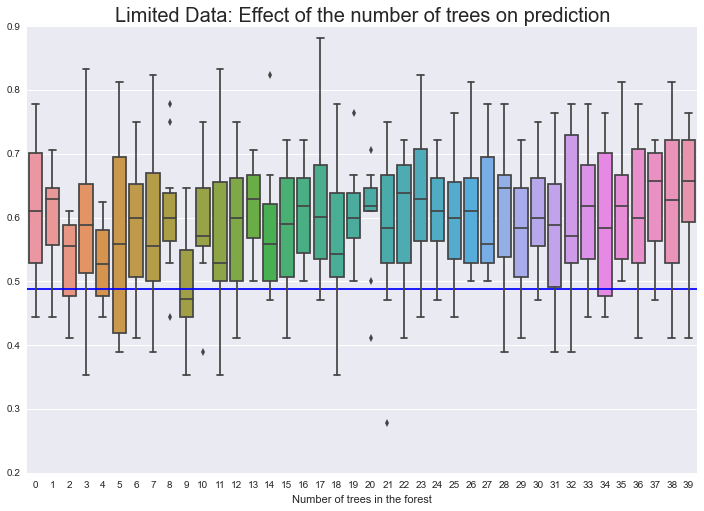

In [240]:
plt.figure(figsize=(12,8))
plt.axhline(y=avg)
plt.title('Limited Data: Effect of the number of trees on prediction', fontsize=20)
plt.xlabel('Number of trees in the forest')
#sns.boxplot(data=scores)
sns.boxplot(data=scores_limited)
plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/limited_data_1_to_40_trees.png')

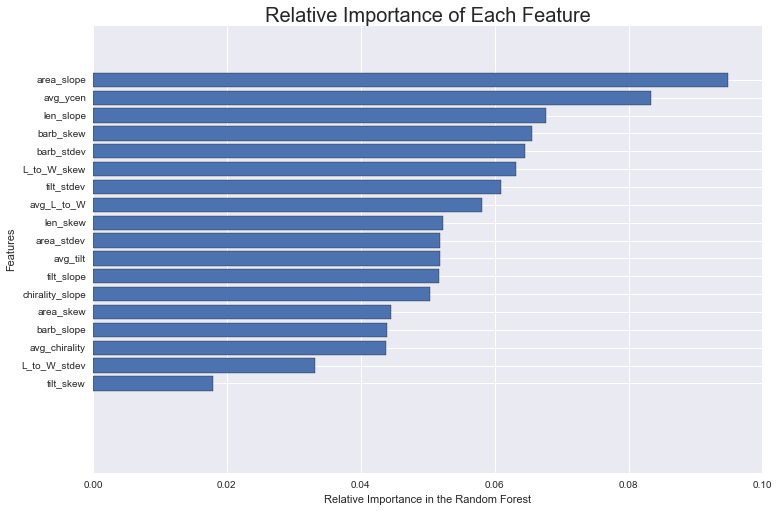

In [241]:
#Whitch features are most useful for prediction?
clf = RandomForestClassifier(n_estimators=15)
clf.fit(X_2,Y)
importance_list = clf.feature_importances_
name_list = good_eruptions.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.figure(figsize=(12,8))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative Importance of Each Feature',fontsize=20)
plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/feature_importances_limited.png')
plt.show()
#plt.savefig('/Users/nschanch/Desktop/REU_2015/ipython_figures/feature_importances_limited.png')